# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.shape

(891, 12)

In [7]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Exploratory Data Analysis

In [10]:
#Dropping empty columns
titanic_data.dropna(axis=1, inplace=True)
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [11]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')

In [12]:
#Encoding the categorical variables of 'Sex' column to numeric
titanic_data['Sex'] = titanic_data['Sex'].apply(lambda x:0 if x=="male" else 1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500


In [13]:
titanic_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Visualizations

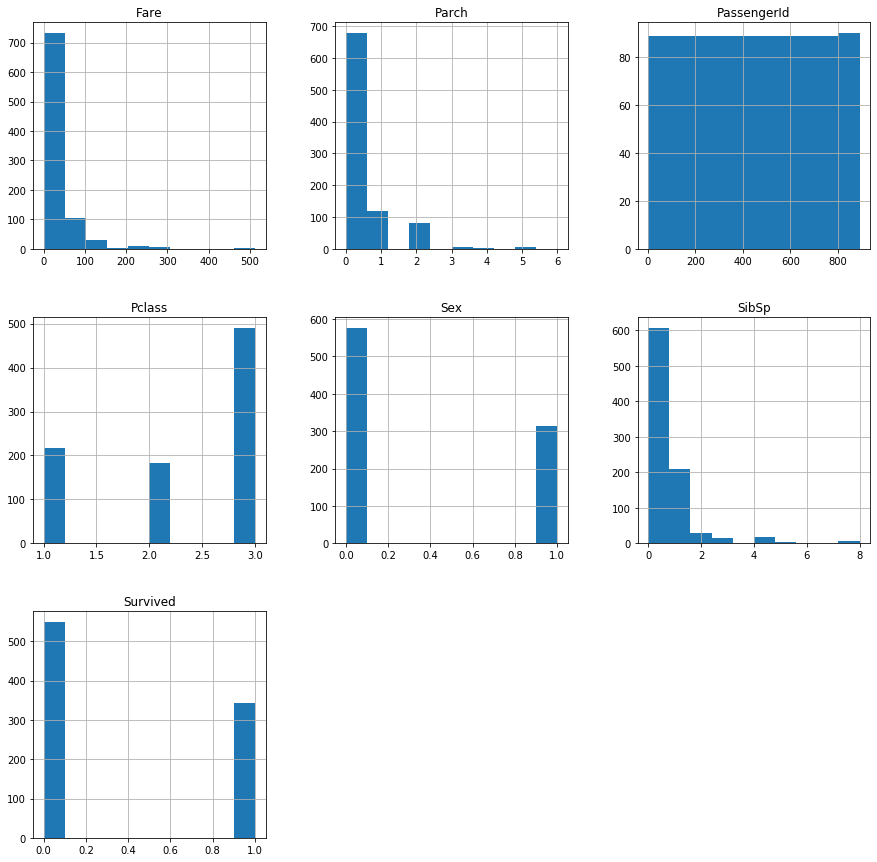

In [15]:
titanic_data.hist(figsize=(15,15))
plt.show()

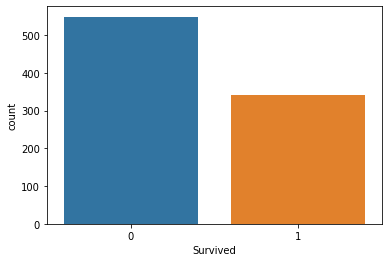

In [14]:
sns.countplot(titanic_data.Survived)

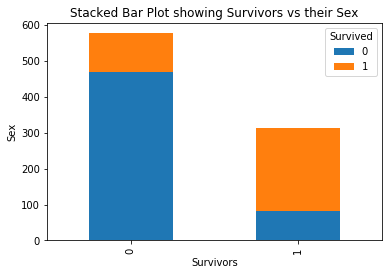

In [20]:
cross = pd.crosstab(titanic_data.Sex, titanic_data.Survived)
cross.plot(kind='bar', stacked=True)
plt.xlabel("Survivors")
plt.ylabel("Sex")
plt.title("Stacked Bar Plot showing Survivors vs their Sex")
plt.show()

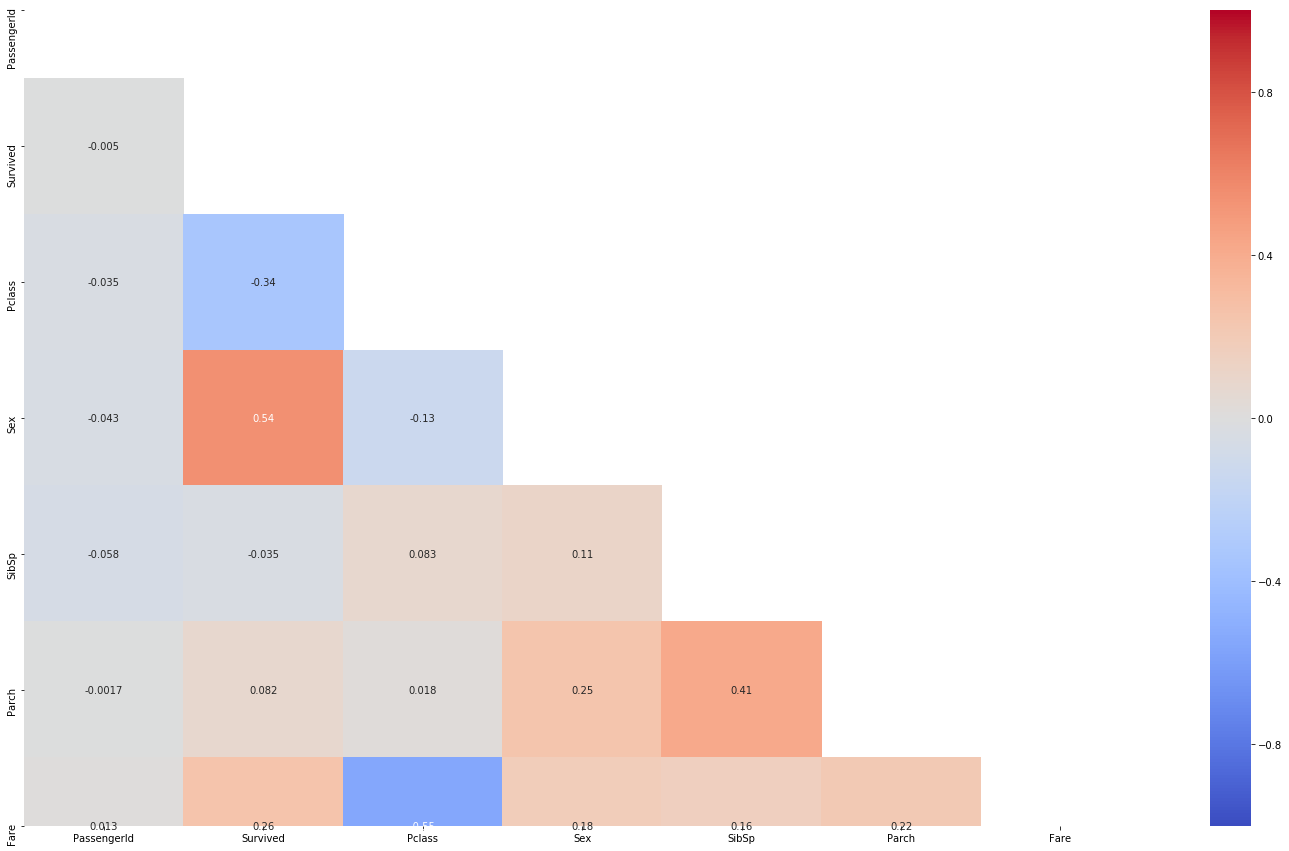

In [25]:
#Heatmap visualization
mask = np.zeros_like(titanic_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(25,15))
sns.heatmap(titanic_data.corr(), vmin=-1, cmap='coolwarm', annot=True, mask=mask)
plt.show()

### Classifiers

In [110]:
#Importing machine learning libraries
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve  

#### Decision Tree Classifier

In [73]:
#Separating features and labels
x = titanic_data.drop(['Survived','Name','Ticket'], axis=1)
y = titanic_data['Survived']

In [111]:
X_train, X_test, y_train, y_test= train_test_split(x, y, stratify=y, train_size=0.8, random_state=1)

In [113]:
#Building the classifier and fitting to training set
dtc = DecisionTreeClassifier(max_depth=9, criterion='gini', random_state=123)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [114]:
#Predicting outcomes for test set values
predy = dtc.predict(X_test)

In [122]:
#Calculating test set accuracy
acc = accuracy_score(y_test, predy)
print("Test set accuracy is:",format(acc*100),"%")

Test set accuracy is: 78.2122905027933 %


In [116]:
print(classification_report(y_test, predy))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.74      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



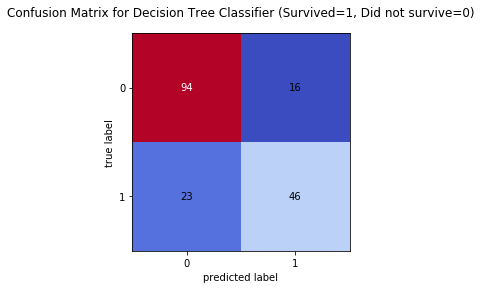

In [118]:
#Plotting the confusion matrix
from mlxtend.plotting import plot_confusion_matrix
conf_mat = confusion_matrix(y_test, predy)
fig,ax = plot_confusion_matrix(conf_mat=conf_mat, cmap='coolwarm')
plt.title("Confusion Matrix for Decision Tree Classifier (Survived=1, Did not survive=0)")
plt.show()

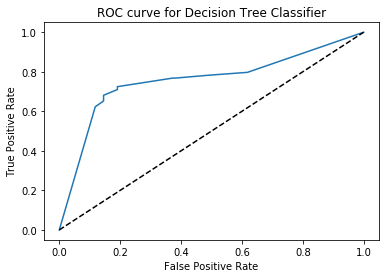

In [120]:
prob = dtc.predict_proba(X_test)  
prob = prob[:, 1]  
fper, tper, thresholds = roc_curve(y_test, prob) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree Classifier')
plt.show()

### Ensemble Learning with different Classifiers

In [143]:
#Import different models and the VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [144]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=123)

In [145]:
#Setting up the different classifiers
lreg = LogisticRegression(random_state=123)
knn = KNN()
dtc = DecisionTreeClassifier(random_state=123)

#List containing the different classifiers
classifiers = [('Logistic Regression', lreg),
('K Nearest Neighbours', knn),
('Classification Tree', dtc)]

In [146]:
for p,q in classifiers:
    print("{},{}".format(p,q))

Logistic Regression,LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
K Nearest Neighbours,KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Classification Tree,DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')


In [158]:
import warnings
warnings.filterwarnings("ignore")

# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:

  #Fit the classifiers to the training set
  clf.fit(X_train, y_train)

  #Predict the labels of the test set
  y_pred = clf.predict(X_test)
  
  #Calculate the accuracies
  acc = accuracy_score(y_test, y_pred)
    
  #Evaluate the accuracy of clf on the test set
  print('{:s} : {:.2f}'.format(clf_name, acc*100), "%")

Logistic Regression : 81.56 %
K Nearest Neighbours : 68.72 %
Classification Tree : 73.18 %


In [159]:
#Printing th classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       114
           1       0.63      0.63      0.63        65

    accuracy                           0.73       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.73      0.73      0.73       179



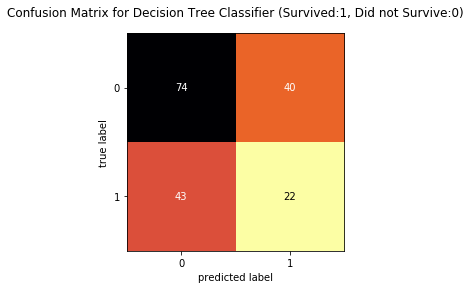

In [160]:
#Printing the confusion matrix
conf_mat = confusion_matrix(y_test, predy)
fig,ax = plot_confusion_matrix(conf_mat=conf_mat, cmap='inferno_r')
plt.title('Confusion Matrix for Decision Tree Classifier (Survived:1, Did not Survive:0)')
plt.show()

### Bagging

In [183]:
from sklearn.ensemble import BaggingClassifier

In [184]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=123)

In [196]:
#Define the Decision tree  
dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.16, random_state=123)

#Define a BaggingClassifier 
bcf = BaggingClassifier(base_estimator=dtc, n_estimators=300, n_jobs=-1) 

#Fit the BaggingClassifier to the training set
bcf.fit(X_train, y_train)

# Predict test set labels
y_pred = bcf.predict(X_test)

#Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.2f}'.format(accuracy*100), "%")

Accuracy of Bagging Classifier: 78.21 %


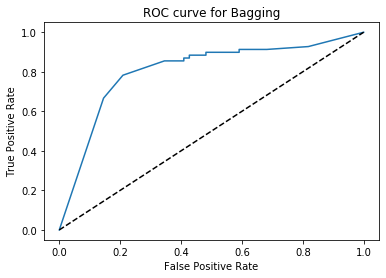

In [199]:
from sklearn.metrics import roc_curve  
prob = bcf.predict_proba(X_test)  
prob = prob[:, 1]  
fper, tper, thresholds = roc_curve(y_test, prob) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Bagging')
plt.show()

### Boosting

In [167]:
from sklearn.ensemble import AdaBoostClassifier

In [182]:
#Define the Decision tree 
dtc = DecisionTreeClassifier(max_depth=1, random_state=123)
#Define the AdaBoost classifier
adb = AdaBoostClassifier(base_estimator=dtc, n_estimators=25)
#Fit the AdaBoost classifier to the training set
adb.fit(X_train, y_train)
# Evaluate and print test-set accuracy
pred_y = adb.predict(X_test)
accuracy = accuracy_score(y_test, pred_y)
print('Accuracy of Adaboost Classifier: {:.2f}'.format(accuracy*100),"%")

Accuracy of Adaboost Classifier: 80.447 %


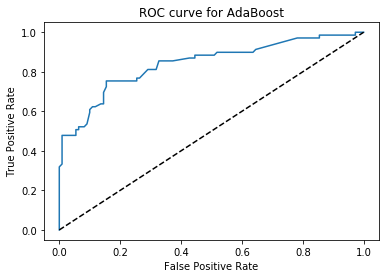

In [197]:
prob = adb.predict_proba(X_test)  
prob = prob[:, 1]  
fper, tper, thresholds = roc_curve(y_test, prob) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for AdaBoost')
plt.show()